# Loan Prediction Project

## Problem Statement : 
**Dream Housing Finance** company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

# Loading Packages

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt   # for plotting graphs
%matplotlib inline
import seaborn as sns   # for data visualisation
import numpy as np   # for mathematical calculations
import warnings           # to ignore any warnings
warnings.filterwarnings("ignore")

# Reading data

In [2]:
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

In [3]:
# creating copy of train and test data
train_original = train.copy()
test_original = test.copy()

## Understanding the data

In [4]:
# Structure of the training and test data
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
# data types of variables in training data
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
# shape of the dataset
train.shape, test.shape

((614, 13), (367, 12))

# Univariate Analysis

In [8]:
# First we will analyze the target variable : 'Loan_status'
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
# Set normalize as True to print proportions instead of numeric values
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

Text(0.5, 1.0, 'Loan Status v/s no. of customers')

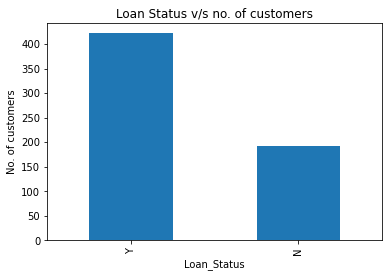

In [10]:
# Bar plot
train['Loan_Status'].value_counts().plot.bar()
plt.xlabel('Loan_Status')
plt.ylabel('No. of customers')
plt.title('Loan Status v/s no. of customers')

Visualizing categorical and ordinal features first

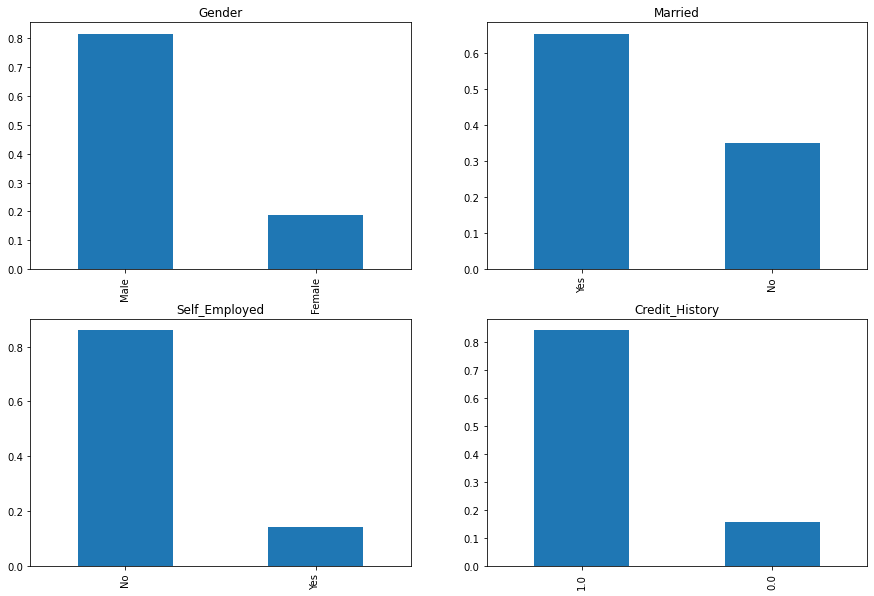

In [11]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(15,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

From the bar plots above, following is inferred :

1. 80% of applicants are male.
2. 65% of the applicants are married.
3. Around 15% are self employed.
4. Around 85% have repaid their debts.

Visualizing ordinal variables

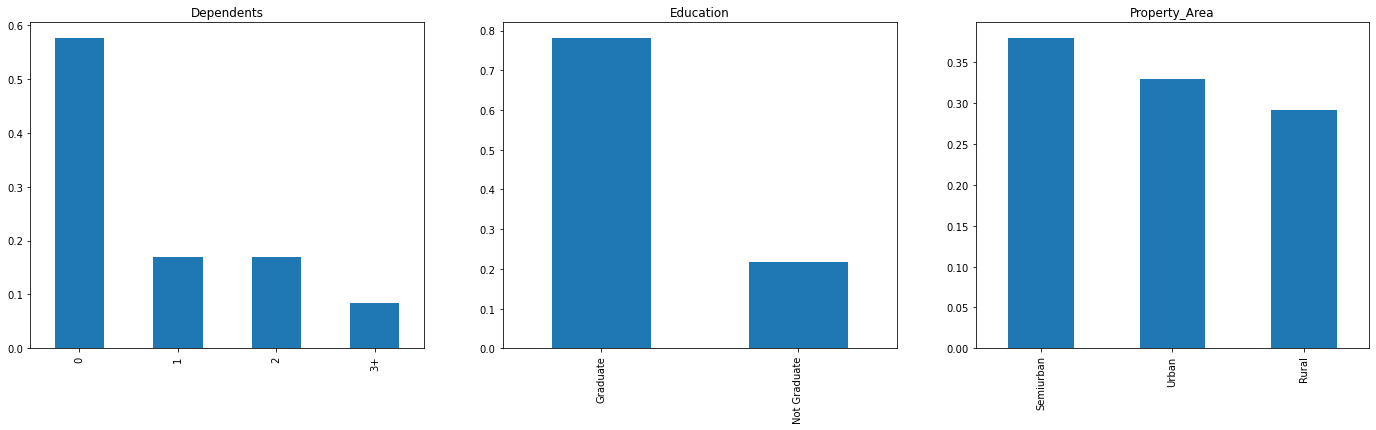

In [12]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

Inference :

1. Most applicants have no dependents. This means that most applicants are fairly young.
2. Around 80% of applicants are graduate.
3. Most applicants are from semi-urban areas.

Visualizing numerical variables

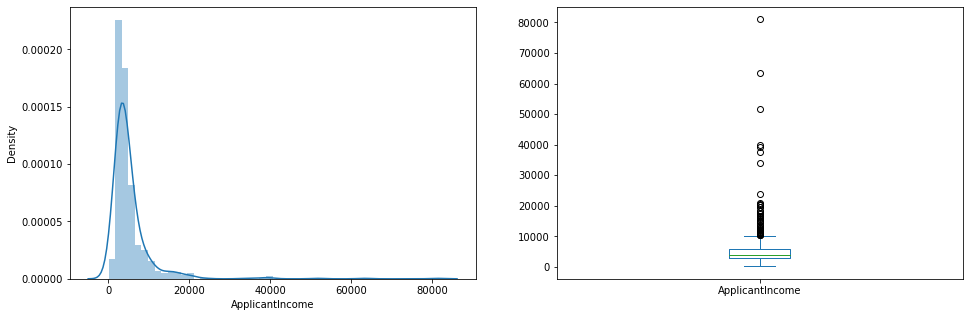

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Most of the data in the above distribution of applicant income is right-skewed or positively skewed, that is, it's not normally distributed.

The boxplot shows the presence of lot of outliers/extreme values. This can be attributed to income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education :

Text(0.5, 0.98, '')

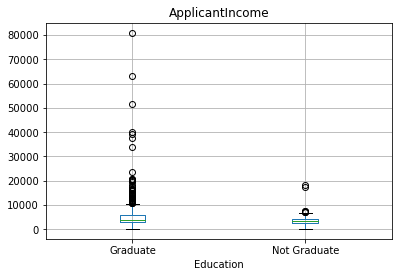

In [14]:
train.boxplot(column="ApplicantIncome", by="Education")
plt.suptitle("")

From above, we see that there are high number of graduates with very high income which are outliers.

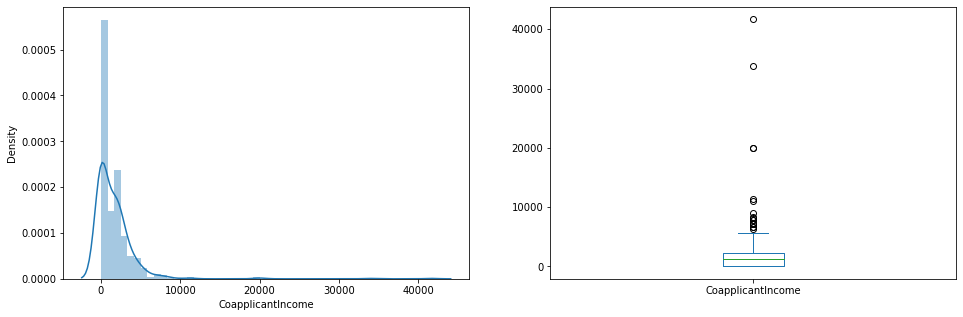

In [15]:
# Coapplicant Income distribution
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

The distribution of coapplicant's income is similar to the distribution of applicant's income.

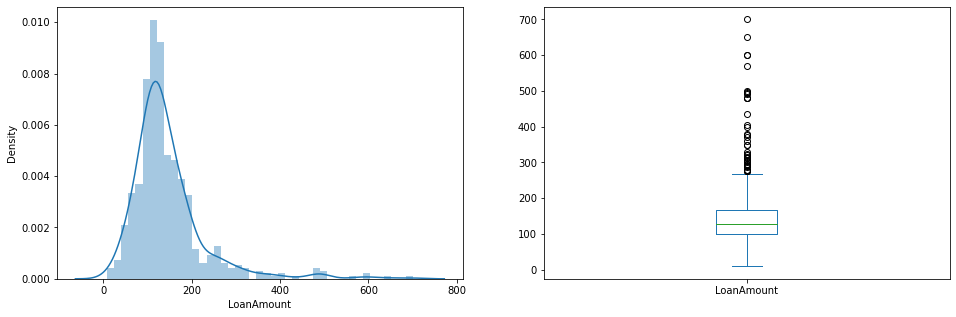

In [16]:
# Loan Amount distribution
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

The distribution is fairly normal and has lot of outliers. Next, we see how each feature correlates with each Loan status.

# Bivariate Analysis

We will test the following hypotheses using bivariate analysis

* Applicants with high income should have more chances of loan approval
* Applicants who have repaid their previous debts should have higher chance of loan approval
* Loan approval should also depend on the loan amount
* Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval

## Categorical Independent Variable vs Target variable

### Gender and Loan Status

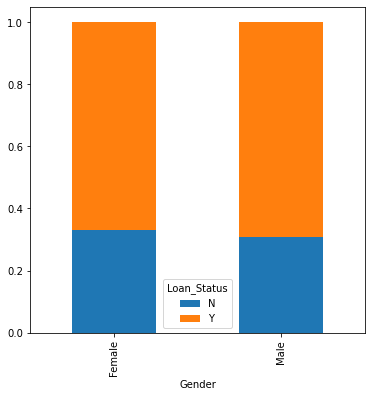

In [17]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))
plt.show()

It can be concluded that the proportion of both male and female applicants is more or less the same for both approved and unapproved loans.

<Figure size 432x288 with 0 Axes>

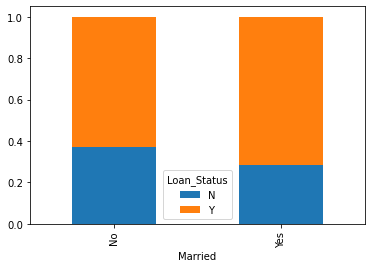

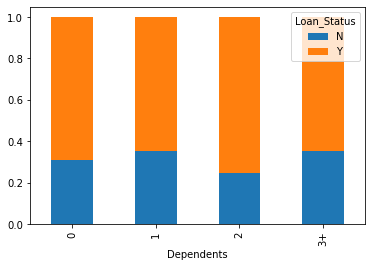

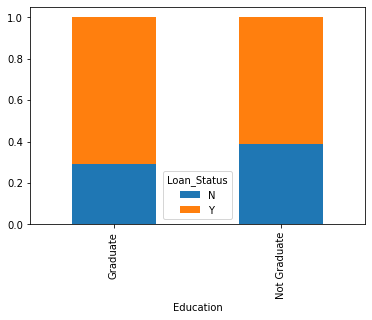

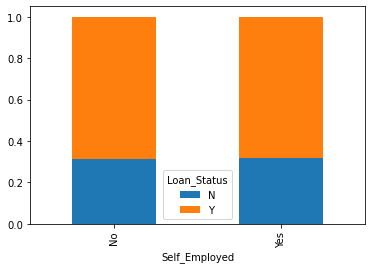

In [18]:
plt.figure(1)
# Married vs Loan Status
Married = pd.crosstab(train['Married'],train['Loan_Status'])
# Dependents vs Loan Status
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
# Education vs Loan Status
Education = pd.crosstab(train['Education'],train['Loan_Status'])
# Self_Employed Status vs Loan Status
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

We see that

* Proportion of unmarried applicants having unapproved loans is higher compared to married applicants. So, being married is more preferable than being unmarried especially when applying for loans.
* Proportion of applicants with 2 dependents is higher for the approved loans

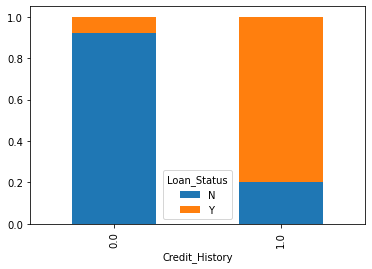

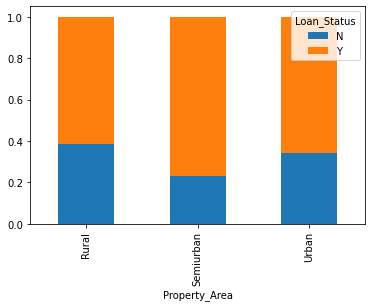

In [19]:
# Credit History vs Loan Status
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
# Property_Area vs Loan Status
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

* Applicants with credit history are more likely to get their loans approved
* Semi-urban areas have higher chances of loan approval than rural and urban areas

## Numerical Independent variable vs Target variable

Let's compare the mean income of applicants whose loan has been approved with the ones not having their loan approved

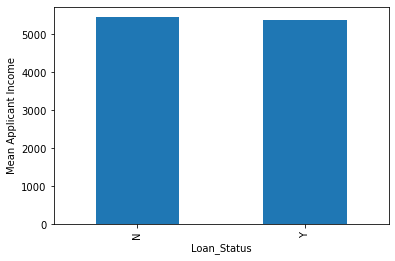

In [20]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.ylabel('Mean Applicant Income')
plt.show()

There is no change in the mean income irrespective of the loan status. Let us make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

### Applicant Income vs Loan Status

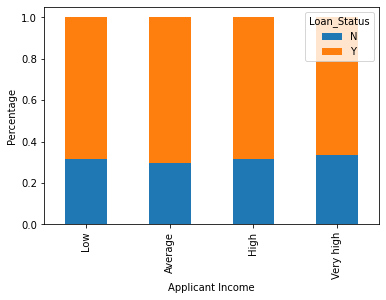

In [21]:
bins = [0,2500,4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very high']
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels=group)

Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Applicant Income')
P = plt.ylabel('Percentage')
plt.show()

We see that there is no effect of applicant income on the chances of loan approval. So, our hypothesis that higher income of applicant will get the loan approved is incorrect.

### Co-applicant income and Loan Status

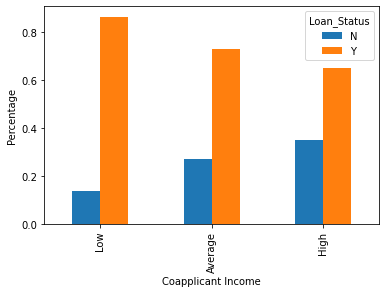

In [22]:
bins = [0,1000,3200, 42000]
group = ['Low', 'Average', 'High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels=group)

Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Coapplicant Income')
P = plt.ylabel('Percentage')
plt.show()

This shows that if the coapplicant's income is less, then the chances of loan approval are high. This looks absurd. The reason behind this could be that most of the applicants don't have a coapplicant, so the coapplicant income is zero for these applicants. So, the loan approval does not depend on coapplicant income. So, to get a better idea, we will combine the applicant's and coapplicant's income to visualize the combined effect on loan approval. 

### Total Income and Loan Status

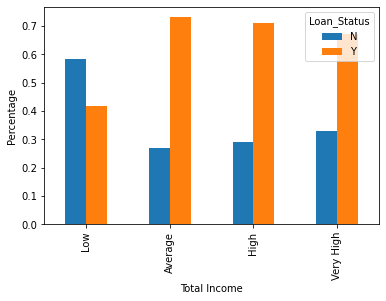

In [23]:
# total income
train['Total_income'] = train['ApplicantIncome']+train['CoapplicantIncome']

bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin'] = pd.cut(train['Total_income'], bins, labels=group)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Total Income')
P = plt.ylabel('Percentage')
plt.show()

We see that the applicants having low total income have less chances of loan approval compared to applicants having average, high, and very high total income.

### Loan Amount and Loan Status

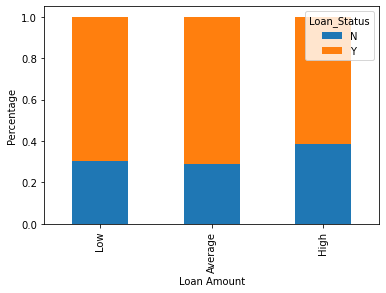

In [24]:
bins = [0, 100, 200, 700]
group = ['Low', 'Average', 'High']
train['Loan_Amount_bin'] = pd.cut(train['LoanAmount'], bins, labels=group)

Loan_Amount_bin = pd.crosstab(train['Loan_Amount_bin'], train['Loan_Status'])
Loan_Amount_bin.div(Loan_Amount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Loan Amount')
P = plt.ylabel('Percentage')
plt.show()

Our hypothesis that the chances of loan approval will be high when the loan amount is less, is correct.

In [25]:
# drop the bins created in the exploration part
train = train.drop(['Income_bin','Coapplicant_Income_bin','Total_Income_bin','Loan_Amount_bin'],axis=1)

# replace'3+' in dependents column as '3' to fit the data in the model
train['Dependents'].replace('3+',3, inplace=True)
test['Dependents'].replace('3+',3, inplace=True)

# replace 'N' with 0 and 'Y' with 1
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1, inplace=True)

# replace Male with 1 and female with 0
train['Gender'] = train['Gender'].map({'Male':1, 'Female':0})
test['Gender'] = test['Gender'].map({'Male':1, 'Female':0})

# replace in Married column : Yes with 1, No with 0
train['Married'] = train['Married'].map({'Yes':1, 'No':0})
test['Married'] = test['Married'].map({'Yes':1, 'No':0})

# replace in Education : Graduate as 1, Not grad as 0
train['Education'] = train['Education'].map({'Graduate':1, 'Not Graduate':0})
test['Education'] = test['Education'].map({'Graduate':1, 'Not Graduate':0})

# replace in Self_Employed : Yes with 1, No with 0
train['Self_Employed'] = train['Self_Employed'].map({'Yes':1, 'No':0})
test['Self_Employed'] = test['Self_Employed'].map({'Yes':1, 'No':0})

# replace in Property_Area : Urban with 2, Rural with 0, Semi-urban with 1
train['Property_Area'] = train['Property_Area'].map({'Urban':2, 'Rural':0, 'Semiurban':1})
test['Property_Area'] = test['Property_Area'].map({'Urban':2, 'Rural':0, 'Semiurban':1})

### Correlation among numerical variables

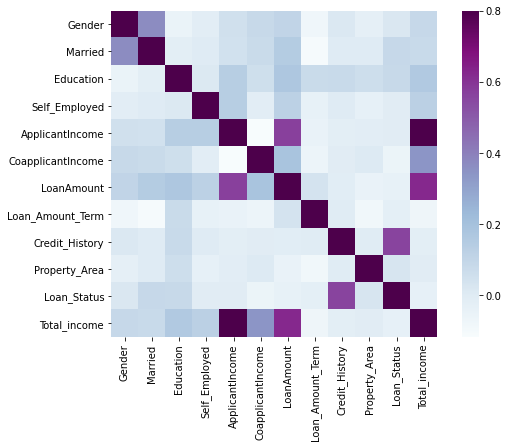

In [26]:
matrix = train.corr()
fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")
plt.show()

* It can be inferred that the credit history is correlated to the loan status, as observed earlier.
* Applicant Income is correlated to Loan Amount
* Coapplicant Income is also correlated to the Loan Amount.

# Data Preprocessing

We will now check if there are anu missing values or outliers. We will impute any missing values and remove outliers so that they do not affect the model performance.

In [27]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_income          0
dtype: int64

We will use the following method to impute missing values :

* **For numerical variables :** impute using mean/median
* **For categorical variables :** impute using mode

In [28]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [29]:
# Next, we find a way to fill the missing values in the Loan Amount term feature

# value counts of the Loan Amount term variable
train['Loan_Amount_Term'].value_counts()

# impute the missing values in this column with '360' since it has the highest value count
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Next, we impute the numerical variable 'LoanAmount' with median as it also has outliers and the mean is not a good approach as it is highly affected 
by outliers.

In [30]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [31]:
# check if there are any missing value still left in the data
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_income         0
dtype: int64

We have imputed all missing values. So, we now impute the missing values from the test data with same approach as above.

In [32]:
test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Married'].fillna(train['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [33]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Outlier Treatment

Having outliers in the data can have a significant effect on the mean and the standard deviation and thus, affecting the distribution.

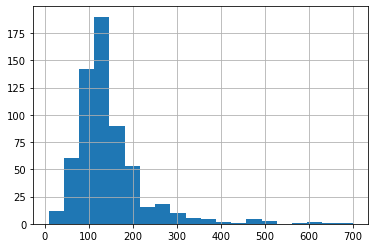

In [34]:
train['LoanAmount'].hist(bins=20)
plt.show()

We see that the bulk of the data is on the left and the right tail is longer. This is called **right-skewness**. So, we will apply log transfomation on this column. After log transformation, we will get a distribution similar to normal distribution.

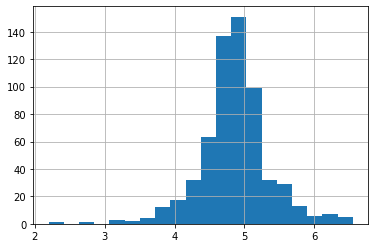

In [35]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
plt.show()

In [36]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Next, we will build logistic regresson model and make predictions

## Model Building 1 - Logistic Regression

In [39]:
# drop the target variable from the 'LoanID' variable as it has no effect on 'LoanStatus'
train = train.drop(['Loan_ID','Total_income'],axis=1)

In [40]:
test = test.drop('Loan_ID',axis=1)

In [41]:
# store the target variable in another dataset
X = train.drop('Loan_Status',axis=1)
y = train['Loan_Status']

### Splitting the dataset into train and validation data

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3)

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Here C=1.0 represents the inverse of regularization strength. Regularization is the penalty applied to increasing the magnitude of parameter values. This is done to reduce overfitting of the model on the training data. Smaller values of C signify stronger regularization.

In [44]:
# predict Loan Status on validation data
pred_cv = model.predict(X_cv)

In [45]:
# find accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_cv, pred_cv)

0.7675675675675676

## Predict Loan Status on test data

In [46]:
pred_test = model.predict(test)

In [47]:
# import submission file 1
submission = pd.read_csv('sample_submission_49d68Cx.csv')

submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [48]:
# replace Y with 1 and N with 0
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [49]:
# new file with final submission
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

### Logistic Regression using Stratified k-folds cross validation

In [50]:
from sklearn.model_selection import StratifiedKFold

i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)    
for train_index,test_index in kf.split(X,y):

    print ('\n{} of kfold {} '.format(i,kf.n_splits))

    xtr,xval = X.iloc[train_index],X.iloc[test_index]

    ytr,yval = y.iloc[train_index],y.iloc[test_index]

    model = LogisticRegression(random_state=1)

    model.fit(xtr,ytr)

    pred_test=model.predict(xval)

    score=accuracy_score(yval,pred_test)

    print ('accuracy_score',score)

    i+=1

pred_test2 = model.predict(test)

pred = model.predict_proba(xval)[:,1]    


1 of kfold 5 
accuracy_score 0.8048780487804879

2 of kfold 5 
accuracy_score 0.8373983739837398

3 of kfold 5 
accuracy_score 0.7967479674796748

4 of kfold 5 
accuracy_score 0.8211382113821138

5 of kfold 5 
accuracy_score 0.7868852459016393


### Visualizing the ROC curve

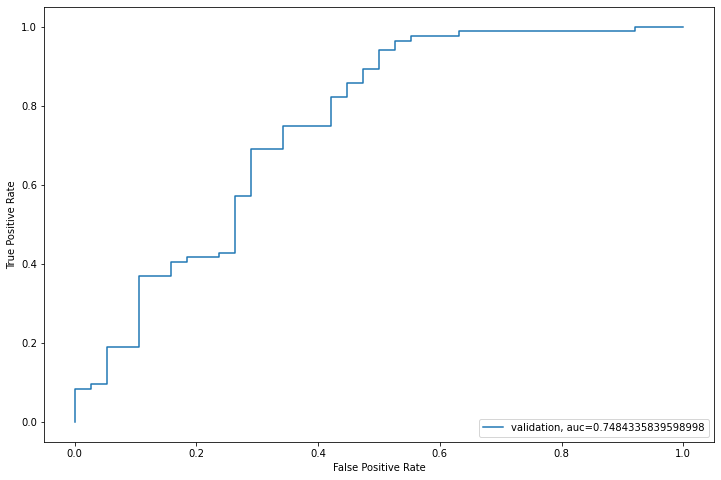

In [51]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(yval, pred)
auc = metrics.roc_auc_score(yval, pred)

plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

We get an auc value of 0.74

In [52]:
# import submission file 2
submission['Loan_Status'] = pred_test2
submission['Loan_ID'] = test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic1.csv')

## Feature Engineering

We can also make new features from existing features to make better predictions. Some new features are listed below:

* Total Income - If total income (Applicant income+Coapplicant income) is high, then chanes of loan approval also become high
* EMI - This is the monthly amount to be paid by the applicant to repay the loan. It can be calculated by taking the ratio of loan amount to the loan amount term
* Balance Income - amount left after paying the EMI

In [53]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

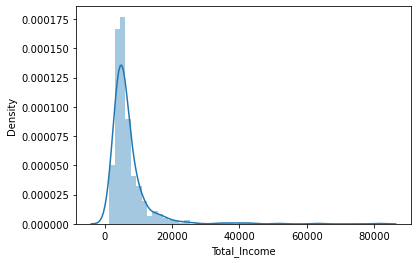

In [54]:
sns.distplot(train['Total_Income'])

We can see that the distribution is right-skewed. So, we take the log transformation to get normal distribution.

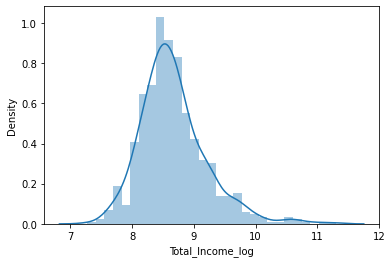

In [55]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

It can be seen that the effect of extreme values has been significantly subsided.

In [56]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

<AxesSubplot:xlabel='EMI', ylabel='Density'>

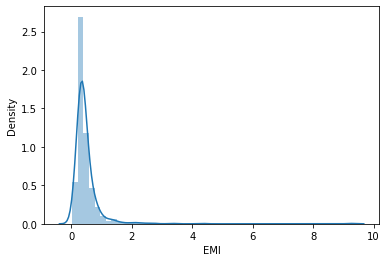

In [57]:
# distribution of EMI variable
sns.distplot(train['EMI'])

In [58]:
# multiply by 1000 to make the units equal
train['Balance_Income'] = train['Total_Income']-(train['EMI']*1000)
test['Balance_Income'] = test['Total_Income']-(test['EMI']*1000)

<AxesSubplot:xlabel='Balance_Income', ylabel='Density'>

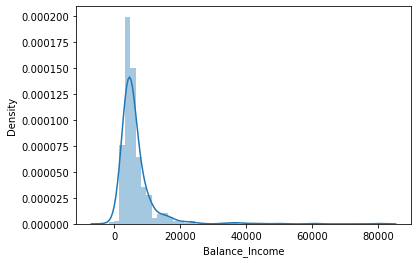

In [59]:
# distribution of Balance income
sns.distplot(train['Balance_Income'])

We will now remove the features used to create these new features. This is because the correlation between the old and the new features will be very high and Logistic regression assumes that the variables are not correlated. Removing these features will also help remove the noise too.

In [62]:
train = train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test = test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

Let's prepare data to feed into the models

In [89]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

## 1- Logistic Regression

In [94]:
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)    
for train_index,test_index in kf.split(X,y):

    print ('\n{} of kfold {} '.format(i,kf.n_splits))

    xtr,xval = X.iloc[train_index],X.iloc[test_index]

    ytr,yval = y.iloc[train_index],y.iloc[test_index]

    model = LogisticRegression(random_state=1)

    model.fit(xtr,ytr)

    pred_test=model.predict(xval)

    score=accuracy_score(yval,pred_test)

    print ('accuracy_score',score)

    i+=1

pred_test3 = model.predict(test)

pred = model.predict_proba(xval)[:,1] 


1 of kfold 5 
accuracy_score 0.8130081300813008

2 of kfold 5 
accuracy_score 0.6910569105691057

3 of kfold 5 
accuracy_score 0.6666666666666666

4 of kfold 5 
accuracy_score 0.8048780487804879

5 of kfold 5 
accuracy_score 0.680327868852459


In [95]:
# import submission file 3
submission['Loan_Status'] = pred_test3
submission['Loan_ID'] = test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic2.csv')

In [96]:
arr1 = np.array([0.8130081300813008,0.6910569105691057,0.6666666666666666,0.8048780487804879,0.680327868852459])
mean_acc = np.mean(arr1)
mean_acc

0.731187524990004

Mean accuracy of Logistic Regression is 73.11%

## 2- Decision Tree

In [97]:
from sklearn import tree

i=1
kf_dt = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)    
for train_index,test_index in kf_dt.split(X,y):

    print ('\n{} of kfold {} '.format(i,kf_dt.n_splits))

    xtr,xval = X.iloc[train_index],X.iloc[test_index]

    ytr,yval = y.iloc[train_index],y.iloc[test_index]
        
    model = tree.DecisionTreeClassifier(random_state=1)

    model.fit(xtr,ytr)

    pred_test=model.predict(xval)

    score=accuracy_score(yval,pred_test)

    print ('accuracy_score',score)

    i+=1

pred_test4 = model.predict(test)


1 of kfold 5 
accuracy_score 0.7398373983739838

2 of kfold 5 
accuracy_score 0.6910569105691057

3 of kfold 5 
accuracy_score 0.7154471544715447

4 of kfold 5 
accuracy_score 0.7235772357723578

5 of kfold 5 
accuracy_score 0.6557377049180327


In [98]:
# import submission file 3
submission['Loan_Status'] = pred_test3
submission['Loan_ID'] = test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('DecisionTree.csv')

In [99]:
arr2 = np.array([0.7398373983739838,0.6910569105691057,0.7154471544715447,0.7235772357723578,0.6557377049180327])
mean_acc2 = np.mean(arr2)
mean_acc2

0.705131280821005

Mean accuracy of the Decision Tree Classifier is 70.51%

## 3- Random Forest Classifier

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
i=1
kf_rf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)    
for train_index,test_index in kf_rf.split(X,y):

    print ('\n{} of kfold {} '.format(i,kf_rf.n_splits))

    xtr,xval = X.iloc[train_index],X.iloc[test_index]

    ytr,yval = y.iloc[train_index],y.iloc[test_index]
        
    model = RandomForestClassifier(random_state=1, max_depth=10)

    model.fit(xtr,ytr)

    pred_test=model.predict(xval)

    score=accuracy_score(yval,pred_test)

    print ('accuracy_score',score)

    i+=1

pred_test4 = model.predict(test)


1 of kfold 5 
accuracy_score 0.8211382113821138

2 of kfold 5 
accuracy_score 0.8130081300813008

3 of kfold 5 
accuracy_score 0.8048780487804879

4 of kfold 5 
accuracy_score 0.7723577235772358

5 of kfold 5 
accuracy_score 0.7622950819672131


In [102]:
arr = np.array([0.8211382113821138,0.8130081300813008,0.8048780487804879,0.7723577235772358,0.7622950819672131])
Mean_accuracy = np.mean(arr)
Mean_accuracy

0.7947354391576703

The mean accuracy for Random Forest classifier is 79.47%

## Hyperparameter tuning

We will try to improve accuracy by tuning the hyperparameters for the Random Forest model. We will use Grid search to get optimized value of hyperparameters. We will tune the parameters - max-depth and n_estimators. Max depth is the maximum depth of the tree and n_estimators is the number of decision trees used in Random Forest model.

In [103]:
from sklearn.model_selection import GridSearchCV

paramgrid = {'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,200,20))}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

# split training and test sets
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=1)

# fit the grid seach model
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [104]:
# find the best estimator
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=161, random_state=1)

In [110]:
# Random forest model with best estimators
i=1
kf_rf1 = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)    
for train_index,test_index in kf_rf1.split(X,y):

    print ('\n{} of kfold {} '.format(i,kf_rf1.n_splits))

    xtr,xval = X.iloc[train_index],X.iloc[test_index]

    ytr,yval = y.iloc[train_index],y.iloc[test_index]
        
    model_rf = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=161)

    model_rf.fit(xtr,ytr)

    pred_test=model_rf.predict(xval)

    score=accuracy_score(yval,pred_test)

    print ('accuracy_score',score)

    i+=1

pred_test5 = model_rf.predict(test)

pred_rf = model_rf.predict_proba(test)[:,1]


1 of kfold 5 
accuracy_score 0.8292682926829268

2 of kfold 5 
accuracy_score 0.8455284552845529

3 of kfold 5 
accuracy_score 0.7967479674796748

4 of kfold 5 
accuracy_score 0.7723577235772358

5 of kfold 5 
accuracy_score 0.7868852459016393


In [122]:
arr_2 = np.array([0.8292682926829268,0.8455284552845529,0.7967479674796748,0.7723577235772358,0.7868852459016393])
Mean_accuracy = np.mean(arr_2)
Mean_accuracy

0.806157536985206

The mean accuracy of Random Forest classifier after hyperparameter tuning is 80.61%

In [111]:
# import submission file 4
submission['Loan_Status'] = pred_test5
submission['Loan_ID'] = test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('RandomForest.csv')

Important Features

<AxesSubplot:>

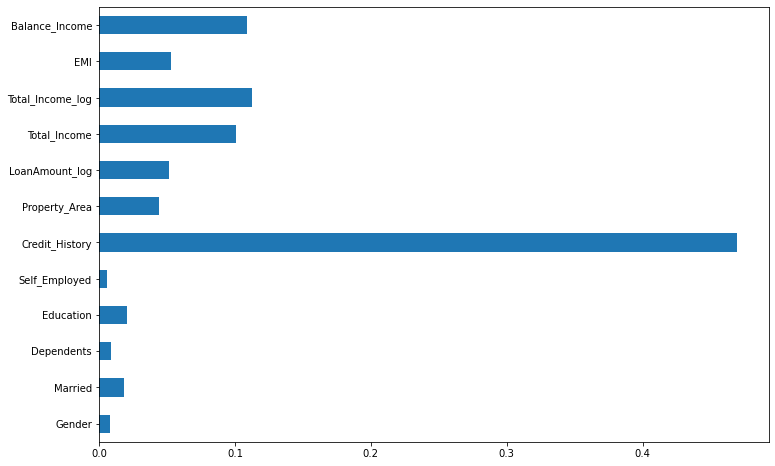

In [112]:
importance = pd.Series(model_rf.feature_importances_, index=X.columns)
importance.plot(kind='barh',figsize=(12,8))

## 4- XGBoost Classifier

In [115]:
pip install xgboost

In [120]:
import xgboost as xgb
from xgboost import XGBClassifier

i=1
kf_xgb = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)    
for train_index,test_index in kf_xgb.split(X,y):

    print ('\n{} of kfold {} '.format(i,kf_xgb.n_splits))

    xtr,xval = X.iloc[train_index],X.iloc[test_index]

    ytr,yval = y.iloc[train_index],y.iloc[test_index]
        
    model_xgb = XGBClassifier(max_depth=4, n_estimators=50)

    model_xgb.fit(xtr._get_numeric_data(),ytr)

    pred_test=model_xgb.predict(xval._get_numeric_data())

    score=accuracy_score(yval,pred_test)

    print('accuracy_score',score)

    i+=1

pred_test6 = model_xgb.predict(test._get_numeric_data())

pred_xgb = model_xgb.predict_proba(test._get_numeric_data())[:,1]


1 of kfold 5 
accuracy_score 0.7804878048780488

2 of kfold 5 
accuracy_score 0.7479674796747967

3 of kfold 5 
accuracy_score 0.7804878048780488

4 of kfold 5 
accuracy_score 0.7723577235772358

5 of kfold 5 
accuracy_score 0.7540983606557377


In [121]:
arr_1 = np.array([0.7804878048780488,0.7479674796747967,0.7804878048780488,0.7723577235772358,0.7540983606557377])
mean_acc_1 = np.mean(arr1)
mean_acc_1

0.731187524990004

The mean accuracy of XGBoost Classifier is 73.11%

In [123]:
# import submission file 5
submission['Loan_Status'] = pred_test6
submission['Loan_ID'] = test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')

In [126]:
print('Accuracy score of Logistic Regression : {}'.format(mean_acc))
print('Accuracy score of Decision Tree Classifier : {}'.format(mean_acc2))
print('Accuracy score of Random Forest Classifier : {}'.format(Mean_accuracy))
print('Accuracy score of XGBoost Classifier : {}'.format(mean_acc_1))


Accuracy score of Logistic Regression : 0.731187524990004
Accuracy score of Decision Tree Classifier : 0.705131280821005
Accuracy score of Random Forest Classifier : 0.806157536985206
Accuracy score of XGBoost Classifier : 0.731187524990004


# Conclusion

So, Random Forest Classifier is the best model.